# Matplotlib
## Consejos generales de Matplotlib: histogramas, agrupaciones y densidad (L) 

## Personalización de leyendas de gráficos

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

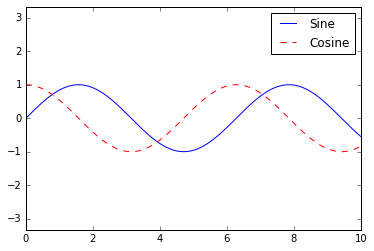

In [2]:
plt.style.use('classic')

%matplotlib inline
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

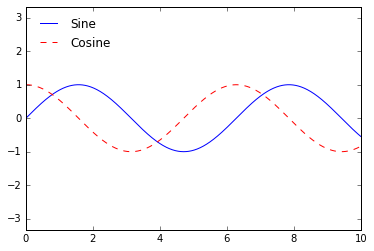

In [3]:
ax.legend(loc = 'upper left', frameon = False)
fig

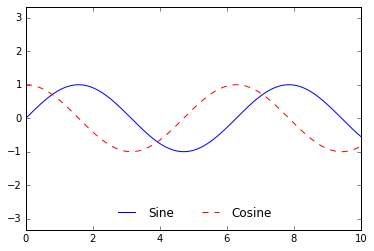

In [4]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig


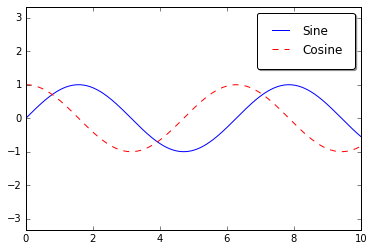

In [5]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

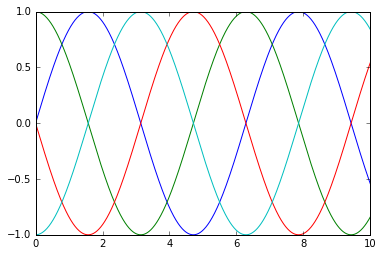

In [6]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

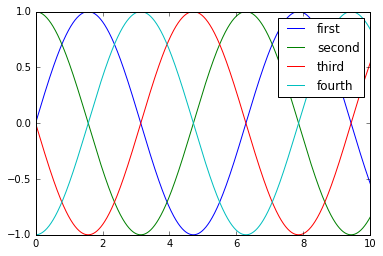

In [7]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
plt.legend(lines, ['first', 'second', 'third', 'fourth']);

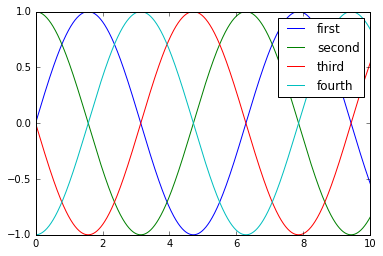

In [8]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
plt.legend(lines, ['first', 'second', 'third', 'fourth']);

In [9]:
lines

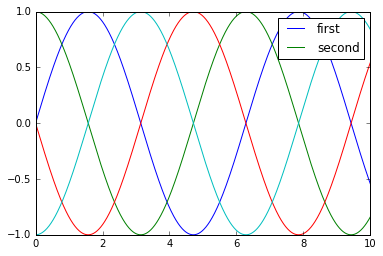

In [10]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);



In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

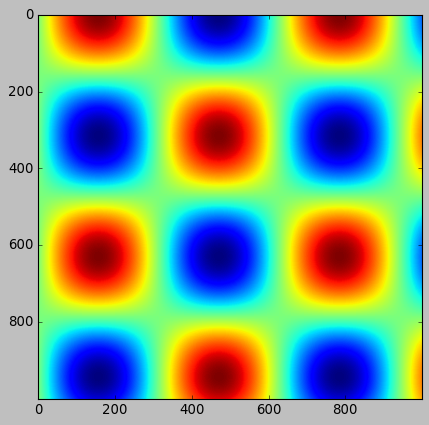

In [12]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I)

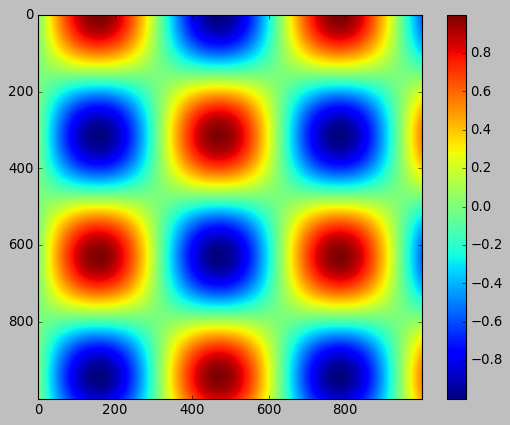

In [13]:
plt.imshow(I)
plt.colorbar()

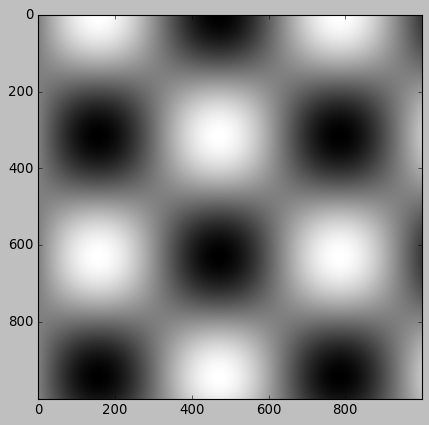

In [14]:
plt.imshow(I,cmap = 'gray')

La cantidad de colores que tiene matplotlib disponibles para personalizar los gráficos es casi infinita. 

En este sitio pueden revisar todas las posibilidades https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

Por ejemplo 

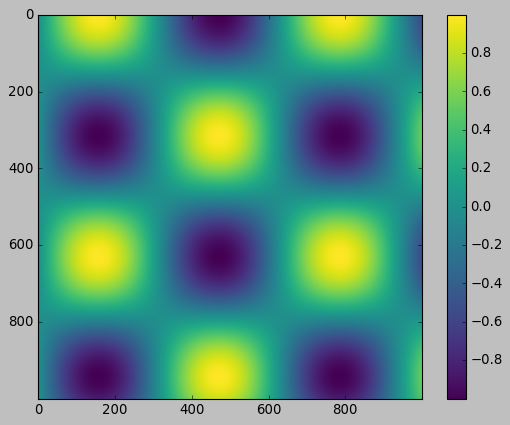

In [15]:
plt.imshow(I, cmap = 'viridis')
plt.colorbar()

In [16]:
 %matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

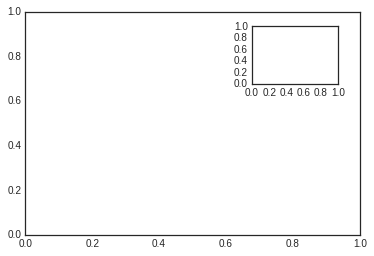

In [17]:
ax1 = plt.axes() # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

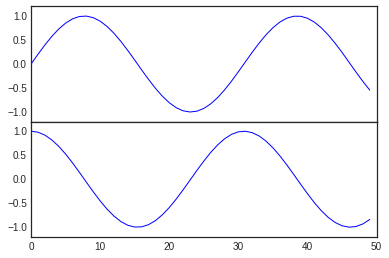

In [18]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

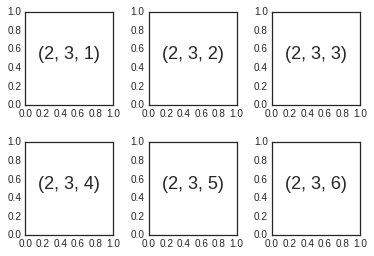

In [19]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
            fontsize=18, ha='center')

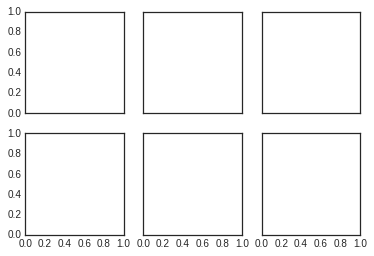

In [20]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

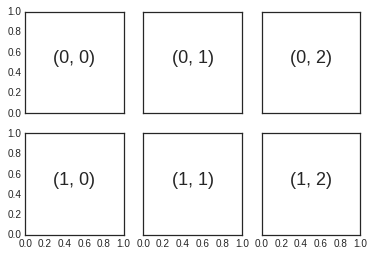

In [21]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

In [22]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
grid

GridSpec(2, 3)

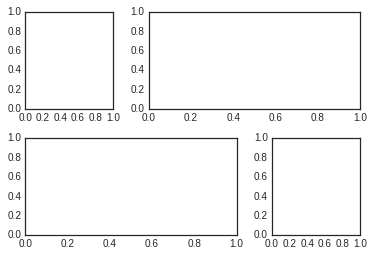

In [23]:
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2]);

In [24]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
        ax[1].legend(['a', 'b', 'c'], loc='lower left')


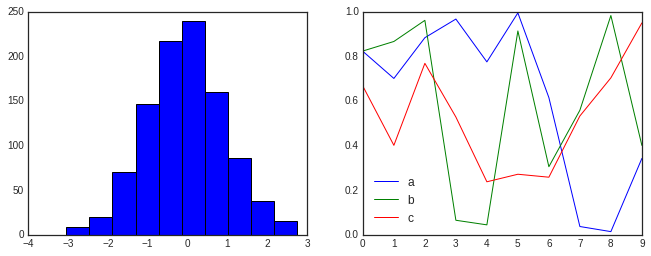

In [25]:
hist_and_lines()

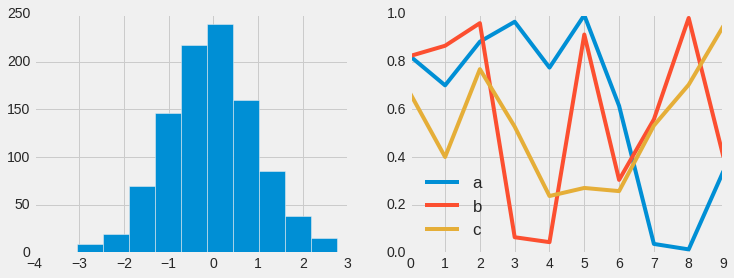

In [26]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

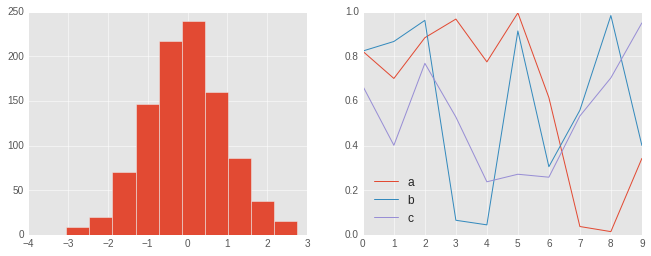

In [27]:
with plt.style.context('ggplot'):
    hist_and_lines()

In [28]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

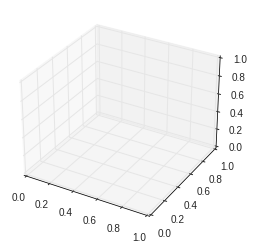

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')

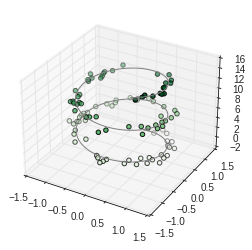

In [30]:
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');


In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [35]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values


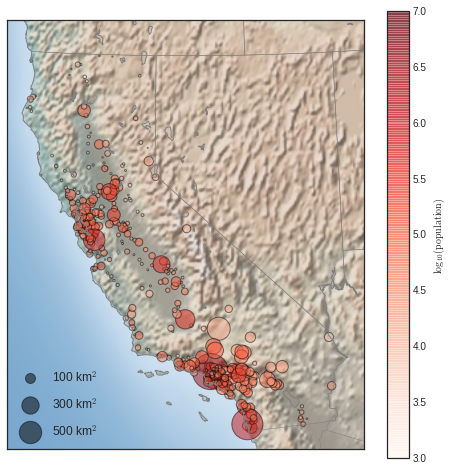

In [36]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)
# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

# Seaborn
## Descripción general del API (L)
## Visualización de relaciones estadísticas Visualización de distribuciones de datos (M)
## Trazado con datos categóricos: cuadrícula de múltiples gráficos. (L)